In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# załadowanie danych
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# kolumny 
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# opis SalePrice
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

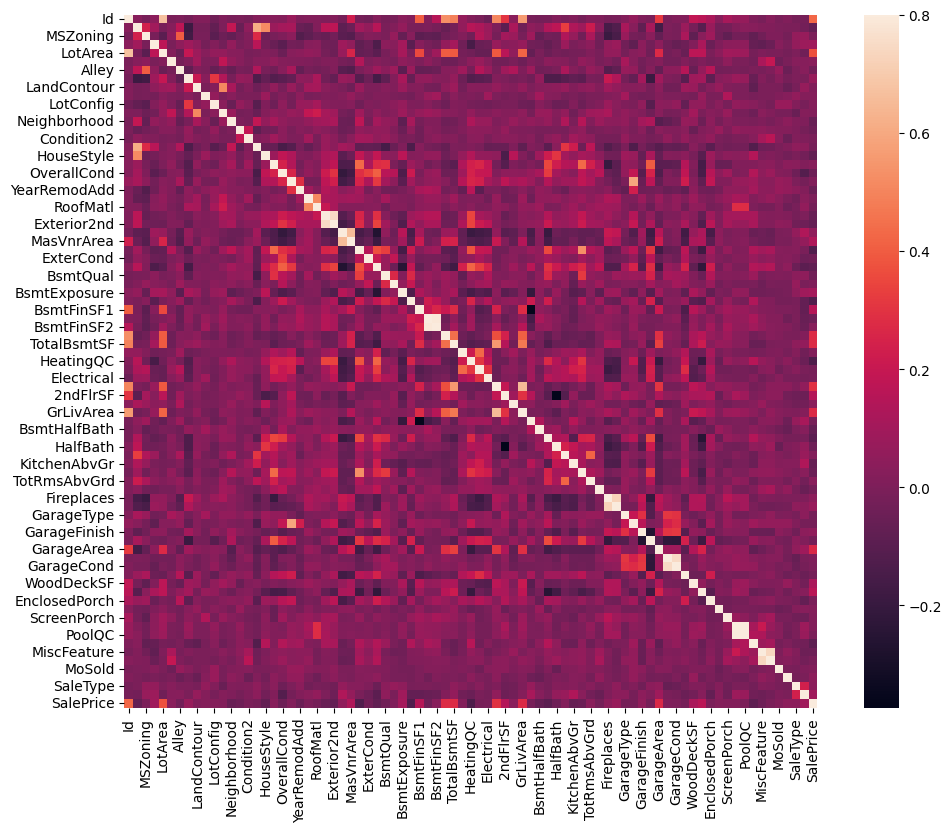

In [5]:
#correlation matrix
corrmat = data.apply(lambda x: x.factorize()[0]).corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

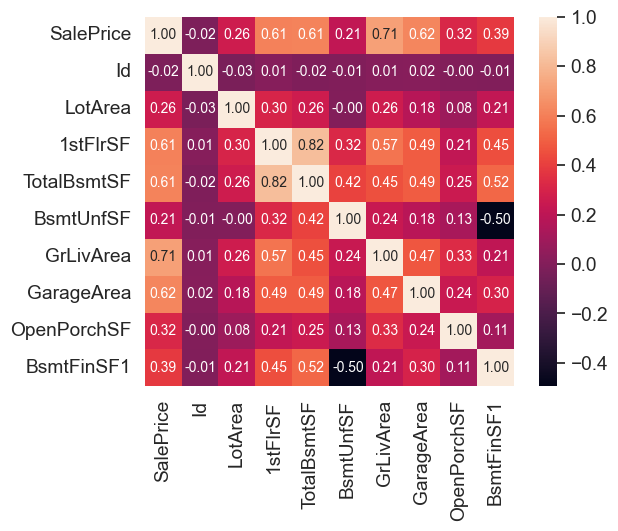

In [6]:
#dokładniejsza heatmapa, zawiera 10 najbardziej istotnych korelacji
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
# sprawdzenie pustych danych
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False).round(2)
empty_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
empty_values = empty_values.head(20)
empty_values

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


In [8]:
# usuwanie niepotrzebnych kolumn z pustymi danymi
for i in range(len(empty_values) - 1):
    data = data.drop(empty_values['Total'].index[i], axis=1)

data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

<Axes: >

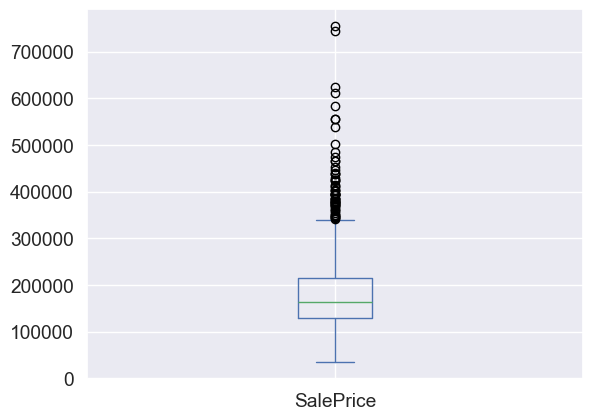

In [9]:
# odstające wartości SalePrice
data['SalePrice'].plot.box()

<Axes: >

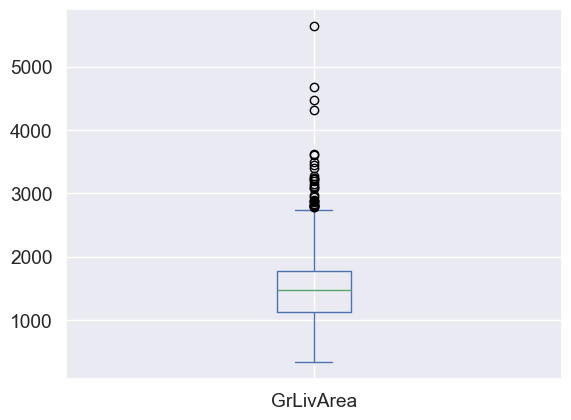

In [10]:
# odstające wartości GrLivArea
data['GrLivArea'].plot.box()

(        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
 0        1          60     8450            7            5       2003   
 1        2          20     9600            6            8       1976   
 2        3          60    11250            7            5       2001   
 3        4          70     9550            7            5       1915   
 4        5          60    14260            8            5       2000   
 ...    ...         ...      ...          ...          ...        ...   
 1455  1456          60     7917            6            5       1999   
 1456  1457          20    13175            6            6       1978   
 1457  1458          70     9042            7            9       1941   
 1458  1459          20     9717            5            6       1950   
 1459  1460          20     9937            5            6       1965   
 
       YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  \
 0             2003         706           0    

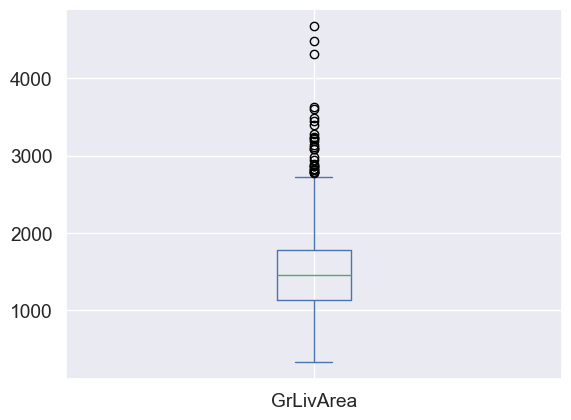

In [11]:
# usuwanie odstających wartości GrLivArea
data = data.drop(data[data['GrLivArea'] > 5000].index)
data['GrLivArea'].plot.box()# dane do uczenia, usunięcie kolumn typu Object uniemożliwiających nauczenie modelu XGBoosterem oraz wypełnienie pustych wartości średnią z danej kolumny
train_X = data.loc[:,:'SaleCondition']
train_y = data['SalePrice'].to_numpy()
test_X = test.copy()

numeric_cols = train_X.dtypes[train_X.dtypes != 'object'].index

train_X = train_X[numeric_cols]
test_X = test_X[numeric_cols]

train_X, test_X, train_y

In [12]:
#utworzenie funkcji do detekcji poprawności predykcji modelu
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, train_X, train_y, cv=10)
    return pred.mean()

In [13]:
#przyuczenie modelu XGBRegressor danymi treningowymi
model = XGBRegressor()
model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
predictions = model.predict(test_X)

In [15]:
cross_val(model)

0.8586327868564967

In [16]:
# Ewaluacja modelu na danych treningowych
train_predictions = model.predict(train_X)
mse = mean_squared_error(train_y, train_predictions)
r2 = r2_score(train_y, train_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 2446343.272112987
R-squared (R2): 0.9996123567559827


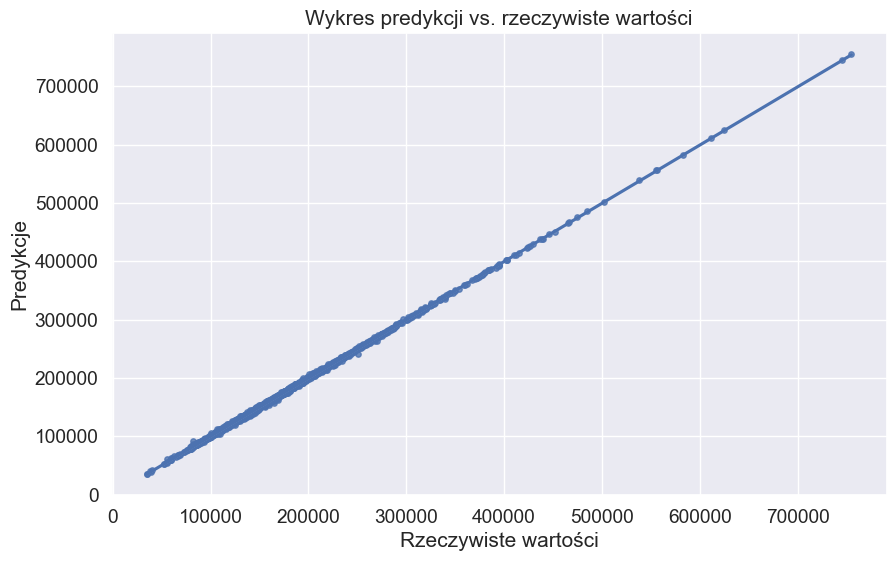

In [17]:
# Wykres predykcji vs. rzeczywiste wartości
plt.figure(figsize=(10, 6))
sns.regplot(x=train_y, y=train_predictions, scatter_kws={'s': 15})
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Predykcje')
plt.title('Wykres predykcji vs. rzeczywiste wartości')
plt.show()

In [19]:
#utworzenie DataFramu z wynikami
submission = pd.DataFrame({'Id' :test_X['Id'], 'SalePrice':predictions})

In [20]:
submission.to_csv('submission.csv', index=False)